In [39]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

## Specify parameters

First we need to specify the paths to the experiment results. The structure of `experiments` folder is as folows. First goes the `country` name, then `state` or `district` name, then the name of the `policy` and finally `scenario`.

In [34]:
country = 'Saint Lucia'
districts = next(os.walk(f'../experiments/{country}'))[1]
policies = next(os.walk(f'../experiments/{country}/{districts[0]}'))[1]
scenarios = next(os.walk(f'../experiments/{country}/{districts[0]}/{policies[0]}'))[1]
file_name = 'hh_asset_loss'
path = f'../experiments/{country}/{districts[0]}/{policies[0]}/{scenarios[0]}/{file_name}.csv'
df = pd.read_csv(path, index_col=0)
n_replications = df.shape[1]

print(f'Country: {country}')
print(f'Districts: {districts}')
print(f'Policies: {policies}')
print(f'Scenarios: {scenarios}')
print(f'Replications: {n_replications}')

Country: Saint Lucia
Districts: ['AnseLaRayeCanaries', 'Castries', 'Choiseul', 'Dennery', 'Gros Islet', 'Laborie', 'Micoud', 'Soufriere', 'Vieuxfort']
Policies: ['None', 'PDS']
Scenarios: ['100']
Replications: 100


## Load data

Now we can load the files of interest.

In [4]:
def _load_experiments():
    pass
def _get_ids_of_affected_households():
    pass

In [47]:
ids = {}
for district in tqdm(districts):
    ids[district] = {}
    for policy in policies:
        ids[district][policy] = {}
        for scenario in scenarios:
            ids[district][policy][scenario] = {}
            path = f'../experiments/{country}/{district}/{policy}/{scenario}/'
            for replication in range(n_replications):
                df = pd.read_csv(path + f'affected_hh_data_replication_{replication}.csv')
                ids[district][policy][scenario][replication] = df['hhid'].tolist()

100%|██████████| 9/9 [00:04<00:00,  2.03it/s]


In [48]:
# Outcomes structure: district -> policy -> scenario -> outcome -> data -> replication -> value
outcomes = {}
for district in districts:
    outcomes[district] = {}
    for policy in policies:
        outcomes[district][policy] = {}
        for scenario in scenarios:
            outcomes[district][policy][scenario] = {}
            path = f'../experiments/{country}/{district}/{policy}/{scenario}/'
            households = pd.read_csv(path + 'household_data.csv')
            affected_households = pd.read_csv(path + 'hh_is_affected.csv', index_col=0)
            impoverished_households = pd.read_csv(path + 'hh_is_impoverished.csv', index_col=0)
            households_weeks_in_poverty = pd.read_csv(path + 'hh_weeks_pov.csv', index_col=0)

            # Units for the household consumption loss are in USD

            household_consumption_loss = pd.read_csv(path + 'hh_consumption_loss.csv', index_col=0)
            # * drm costs - Disaster Risk Management costs
            # drm_costs = pd.read_csv(path + 'hh_DRM_cost.csv', index_col=0)
            outcomes[district][policy][scenario]['households'] = households
            outcomes[district][policy][scenario]['affected_households'] = affected_households
            outcomes[district][policy][scenario]['impoverished_households'] = impoverished_households
            outcomes[district][policy][scenario]['households_weeks_in_poverty'] = households_weeks_in_poverty
            outcomes[district][policy][scenario]['household_consumption_loss'] = household_consumption_loss
            # outcomes[district][policy][scenario]['drm_costs'] = drm_costs


In [6]:
# Consumption loss and poverty impacts

In [50]:
len(ids[district][policy][scenario][replication])

62

In [55]:
(outcomes[district][policy][scenario]['household_consumption_loss']['replication_99'] > 0).sum()

55

In [56]:
district, policy, scenario, replication

('Vieuxfort', 'PDS', '100', 99)

In [36]:
d = {}
for policy in policies:
    data = {}
    for district in districts:
        households = outcomes[district][policy][scenario]['households']
        # i =  
        household_consumption_loss = outcomes[district][policy][scenario]['household_consumption_loss']
        df = pd.DataFrame()
        
        # Subset households with positive consumption loss
        index = household_consumption_loss[household_consumption_loss.mean(axis=1) > 0].index

        # Mean meaning across replications
        df['mean_household_consumption_loss'] = household_consumption_loss.loc[index,:].mean(axis=1)
        df.index = index
        df = pd.merge(df, households[['popwgt', 'is_poor', 'district']], left_index=True, right_index=True, how='right')
        df.fillna(0, inplace=True)
        df['mean_consumption_loss'] = (df['mean_household_consumption_loss'] / df['popwgt']) * 100
        df.columns = ['mean_household_consumption_loss', 
                      'mean_consumption_loss', 
                      'popwgt', 'is_poor', 'district'] 
        data[district] = df
        print(f'Mean household consumption loss per affected household in {district}: {round(df["mean_consumption_loss"].mean())}')
    data = pd.concat(data.values())
    d[policy] = data

Mean household consumption loss per affected household in AnseLaRayeCanaries: 116
Mean household consumption loss per affected household in Castries: 116
Mean household consumption loss per affected household in Choiseul: 116
Mean household consumption loss per affected household in Dennery: 116
Mean household consumption loss per affected household in Gros Islet: 116
Mean household consumption loss per affected household in Laborie: 116
Mean household consumption loss per affected household in Micoud: 116
Mean household consumption loss per affected household in Soufriere: 116
Mean household consumption loss per affected household in Vieuxfort: 116
Mean household consumption loss per affected household in AnseLaRayeCanaries: 116
Mean household consumption loss per affected household in Castries: 116
Mean household consumption loss per affected household in Choiseul: 116
Mean household consumption loss per affected household in Dennery: 116
Mean household consumption loss per affected 

In [31]:
household_consumption_loss

,replication_0,replication_1,replication_2,replication_3,replication_4,replication_5,replication_6,replication_7,replication_8,replication_9,...,replication_90,replication_91,replication_92,replication_93,replication_94,replication_95,replication_96,replication_97,replication_98,replication_99
0,-0.000000,-0.0,-0.0,712.005064,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,...,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.000000,480.206032,-0.000000
1,-0.000000,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,0.0,-0.0,...,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000
2,412.918895,-0.0,-0.0,-0.000000,-0.0,1261.924791,-0.000000,-0.0,-0.0,-0.0,...,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,936.124449,-0.000000,-0.000000
3,-0.000000,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,...,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000
4,-0.000000,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,...,-0.0,-0.000000,-0.0,959.448163,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,-0.000000,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,...,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000
1489,-0.000000,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,...,-0.0,-0.000000,-0.0,-0.000000,44.585375,-0.0,-0.0,-0.000000,-0.000000,-0.000000
1490,64.578837,-0.0,-0.0,-0.000000,-0.0,-0.000000,153.002578,-0.0,-0.0,-0.0,...,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000
1491,-0.000000,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.0,...,-0.0,-0.000000,-0.0,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,4.535206


In [10]:
df['mean_household_consumption_loss'].mean()

30.414754813556428

In [ ]:
# Mean across all or mean across affected
# Mean across affected will give us an average consumption loss per affected household
# Mean across all will give us an average consumption loss per household

In [96]:
(df['mean_household_consumption_loss'] * df['popwgt']).mean()

2832.053970039066

In [147]:
# ?: Should I do rescaling here? I think we already did that in `_adjust_asset_and_expenditure()`

Policy: None
 : 0.19913
 : 0.57482
Policy: PDS
 : 0.12832
 : 0.67303


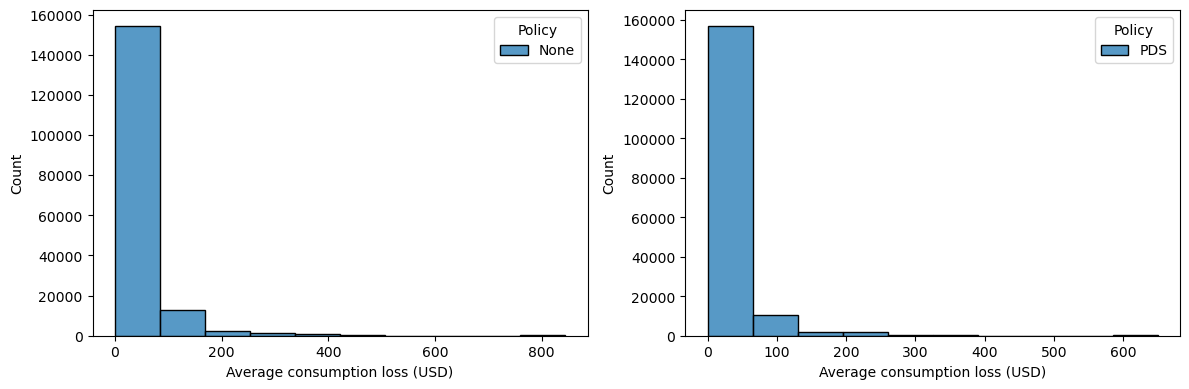

In [13]:
ncols = 2
fig, ax = plt.subplots(ncols=ncols, figsize=(12, 4))
for i, policy in enumerate(policies):
    print(f'Policy: {policy}')
    df = d[policy]
    # ?: What's that?
    print(' :', round(df.loc[df['mean_household_consumption_loss'] > 50, 'popwgt'].sum() / df['popwgt'].sum(), 5))
    print(' :', round(df.loc[df['mean_household_consumption_loss'] < 20, 'popwgt'].sum() / df['popwgt'].sum(), 5))    
    column = 'mean_household_consumption_loss'
    sns.histplot(data=df, x=column, weights='popwgt', bins=10, label=policy, ax=ax[i]);
    ax[i].set_xlabel('Average consumption loss (USD)')
    ax[i].legend(title='Policy');
fig.tight_layout()

Let's quantify socio-economics resilience.

In [31]:
# Total consumption loss = (Mean consumption loss across replications X population weight).sum()
# Total consumption loss of households that lost something at a given replication
total_consumption_loss = (df['mean_consumption_loss'] * df['popwgt']).sum()
total_population = round(df['popwgt'].sum())
# Print total consumption loss with , separator and 2 decimal places
print(f'Total consumption loss: {round(total_consumption_loss):,}')
print(f'Total population: {total_population:,}')

# Average consumption loss per capita
average_consumption_loss = round(total_consumption_loss.sum() / total_population)
print(f'Average consumption loss per capita: {average_consumption_loss}')

Total consumption loss: 4,540,923
Total population: 172,638
Average consumption loss per capita: 26


In [32]:
districts

['AnseLaRayeCanaries',
 'Castries',
 'Choiseul',
 'Dennery',
 'Gros Islet',
 'Laborie',
 'Micoud',
 'Soufriere',
 'Vieuxfort']

In [44]:
d['None']['district'].unique()

array(['Vieuxfort'], dtype=object)

In [37]:
outcomes['AnseLaRayeCanaries']['None']['100'].keys()

dict_keys(['households', 'affected_households', 'impoverished_households', 'households_weeks_in_poverty', 'household_consumption_loss'])

In [42]:
d['None']

,mean_household_consumption_loss,popwgt,aeexp,mean_consumption_loss,is_poor,district
0,25.177194,142.842379,415.866756,17.625858,False,Vieuxfort
1,24.746404,28.568476,198.621476,86.621365,False,Vieuxfort
2,122.602541,99.173424,244.517986,123.624391,False,Vieuxfort
3,15.450896,50.108673,886.502748,30.834774,False,Vieuxfort
4,55.413588,20.201992,515.871994,274.297641,False,Vieuxfort
...,...,...,...,...,...,...
1488,64.164016,63.754343,207.694959,100.642581,False,Vieuxfort
1489,3.380171,38.973412,32.463579,8.673018,True,Vieuxfort
1490,30.916323,99.173416,280.265714,31.174002,False,Vieuxfort
1491,0.377466,239.975185,106.316967,0.157294,True,Vieuxfort


In [40]:
x = d['None']
y = d['Castries']['100']

KeyError: 'Castries'

In [ ]:
x

In [ ]:
gdf = gpd.read_file('datasets/admin_boundaries/tls_admbnda_adm1_who_ocha_20200911.shp')

gdf.loc[gdf['ADM1_EN']=='Lautém', 'ADM1_EN'] = "Lautem"
gdf.loc[gdf['ADM1_EN']=='Liquiçá', 'ADM1_EN'] = "Liquia"

gdf['PML'] = gdf['ADM1_EN'].map(dict(zip(asset_damage_df['Region'],asset_damage_df['PML'])))

cons_loss_per_district = {}
for d in gdf['ADM1_EN']:
    _slc = hh_districts_df['district']==d
    df_cons_wgt_ = df_cons_wgt[_slc]
    cons_loss_per_district[d] = df_cons_wgt_['conswgt'].sum()
    
gdf['ConsLoss'] = gdf['ADM1_EN'].map(cons_loss_per_district)
gdf['SocResil'] = gdf['PML'] / gdf['ConsLoss']